# `Lead Scoring `
### Predicting the scores of lead conversion

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

#### `Business Objective:`
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The scores must lie between 0 and 100. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

import warnings
warnings.filterwarnings('ignore')

## Reading and Inspecting the data

In [2]:
#Importing the dataset and having a glance
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Shape of the dataset 
leads.shape

(9240, 37)

In [4]:
#Information of the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

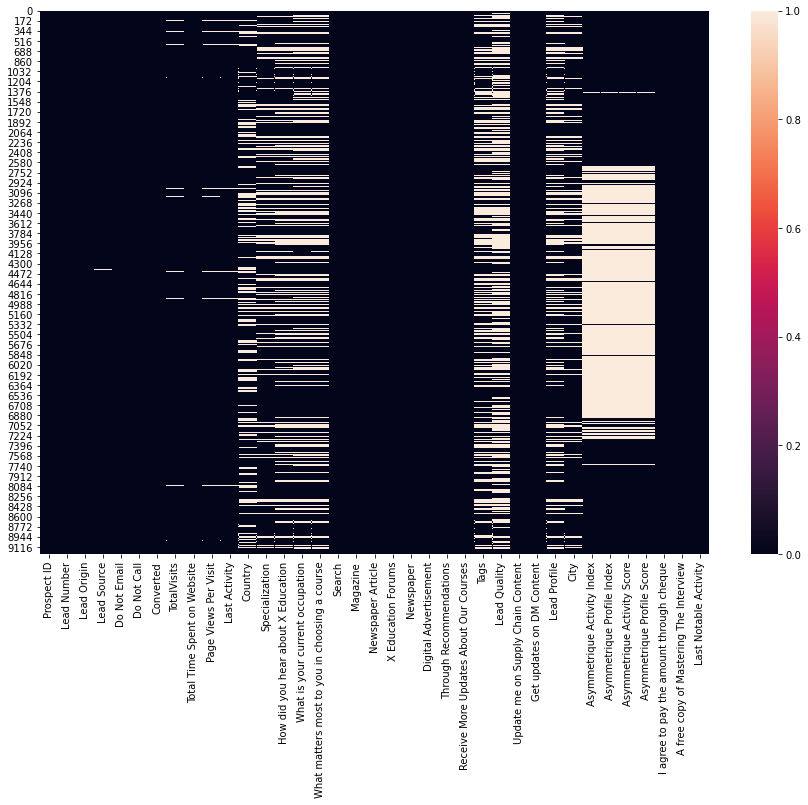

No. of columns with Null values: 17


,count,percent
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [5]:
#Distribution of null values in our data
plt.figure(figsize=(15,10))
sns.heatmap(leads.isnull())
plt.show()

#Total number of columns with null values
print('No. of columns with Null values:',leads.isnull().sum()[leads.isnull().sum()>0].shape[0])

#Checking null values
pd.DataFrame({'count':leads.isnull().sum(),'percent':round((leads.isnull().sum()/leads.shape[0])*100, 2)}).sort_values('percent',ascending=False)

- __17 out of 37 columns__ seem to have null values
- Many columns have __~36% or more missing values__, this will be considered as the threshold. Columns with 36% or more missing values will be dropped.
- Missing values in columns of `Lead Source` and `Last Activity` will have the rows dropped at those indices.
- A pattern can be observed in missing values in some columns where the values are missing in the same rows.
- __Null values treatment__ will be required and will be done in the further steps.

In [6]:
#Unique values of categorical columns and it's count
for i in leads.drop('Prospect ID', axis=1).select_dtypes('object'):
    print('Column:',i)
    print('*'*35)
    print(leads[i].value_counts(dropna=False),'\n\n','No. of unique values:',leads[i].nunique(),'\n','-'*70)

Column: Lead Origin
***********************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

 No. of unique values: 5 
 ----------------------------------------------------------------------
Column: Lead Source
***********************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
Pay per Click Ads       1
testone                 1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype

- Some columns have __only 1 category__, such columns can be dropped since they don't help us in making decisions for our dependant variable.
- Some columns with 2 categories also seem to have __categories with extremely low number of observations__, such columns can be dropped too.
- Some columns have __'Select'__ as a category, which means that no option was selected. This can be considered as NULL values and will be marked as per that.

In [7]:
#Description of numerical columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data cleaning

In [8]:
#Checking Missing values
pd.DataFrame({'count':leads.isnull().sum(),'percent':round((leads.isnull().sum()/leads.shape[0])*100, 2)}).sort_values('percent',ascending=False)

,count,percent
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [9]:
#Checking columns which have 'Select' as a category
cols_with_select = []
for i in leads:
    if 'Select' in leads[i].unique():
        cols_with_select.append(i)

#Replacing 'Select' as a category to NULL values
leads[cols_with_select] = leads[cols_with_select].replace({'Select':np.nan})

#Validating above changes
for i in leads[cols_with_select]:
    print('Column:',i)
    print('*'*35)
    print(leads[i].value_counts(dropna=False),'\n')

Column: Specialization
***********************************
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64 

Column: How did you hear about X Education
***********************************
NaN                      72

In [10]:
#Dropping identifier columns since all values are unique and won't contribute in analysis or modelling
print('Shape before dropping:',leads.shape)
leads.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
print('Shape after dropping:',leads.shape)

Shape before dropping: (9240, 37)
Shape after dropping: (9240, 35)


In [11]:
#Dropping columns with > 36% missing values
print('Shape before dropping:',leads.shape)
leads.drop(leads.isnull().sum()[leads.isnull().sum() > 0.36*leads.shape[0]].index, axis=1, inplace=True)
print('Shape after dropping:',leads.shape)

Shape before dropping: (9240, 35)
Shape after dropping: (9240, 25)


In [12]:
#Dropping columns with single unique value
print('Shape before dropping:',leads.shape)
leads.drop(leads.nunique()[leads.nunique()==1].index, axis=1, inplace=True)
print('Shape after dropping:',leads.shape)

Shape before dropping: (9240, 25)
Shape after dropping: (9240, 20)


In [13]:
#Dropping columns with 2 categories and one of them having <1% of values
print('Shape before dropping:',leads.shape)

#List of columns to drop
cols_2_drop = ['Digital Advertisement','Through Recommendations','Do Not Call','Newspaper Article','Search','Newspaper','X Education Forums']

#Dropping the columns
leads.drop(cols_2_drop, axis=1, inplace=True)
print('Shape after dropping:',leads.shape)

Shape before dropping: (9240, 20)
Shape after dropping: (9240, 13)


In [14]:
#Droping rows with missing values of columns having <1% missing values. 2 columns have such values.
print('Shape before dropping:',leads.shape)

#Dropping the rows
leads = leads.dropna(axis=0, how='any', subset=['Lead Source', 'Last Activity'])
print('Shape after dropping:',leads.shape)

Shape before dropping: (9240, 13)
Shape after dropping: (9103, 13)


In [15]:
#Checking Missing values
pd.DataFrame({'count':leads.isnull().sum(),'percent':round((leads.isnull().sum()/leads.shape[0])*100, 2)}).sort_values('percent',ascending=False)

,count,percent
What matters most to you in choosing a course,2709,29.76
What is your current occupation,2690,29.55
Country,2325,25.54
TotalVisits,29,0.32
Page Views Per Visit,29,0.32
Lead Origin,0,0.00
Lead Source,0,0.00
Do Not Email,0,0.00
Converted,0,0.00
Total Time Spent on Website,0,0.00


#### Imputing Missing Values

For the categorical variables where there is no obvious replacement for missing values we will impute with __'Unknown'__ instead of the __Mode__ since this will give us a better understanding when a lead leaves a field blank and it's significane towards conversion.

In [16]:
#Imputing mean values in 'TotalVisits' and 'Page Views Per Visit'
for i in ['TotalVisits','Page Views Per Visit']:
    leads[i].fillna(leads[i].mean(), inplace=True)

In [17]:
#Function for getting value counts as percent and count
def value_count(col):
    return round(pd.DataFrame({'Percent':leads[col].value_counts(dropna=False, normalize=True)*100, 'Count':leads[col].value_counts(dropna=False)}),2)

In [18]:
### Checking values of 'Country' Column
value_count('Country')

,Percent,Count
India,71.31,6491
NaN,25.54,2325
United States,0.76,69
United Arab Emirates,0.58,53
Singapore,0.26,24
Saudi Arabia,0.23,21
United Kingdom,0.16,15
Australia,0.14,13
Qatar,0.11,10
Bahrain,0.08,7


For `Country` column:
- We will impute the missing values as __'Unknown'__ since imputing with mode (__'India'__) would create a huge bias towards this category and the information obtained might not be true.
- We will also combine all the categories which have lower than `1%` values.
    - Based on the above we can see that all other countries _except 'India' and 'Unknown'_ will fall under this category.

In [19]:
#Making above changes
leads['Country'] = leads['Country'].fillna('Unknown').apply(lambda x: 'Others' if x not in ['India','Unknown'] else x)

#Validating above changes
value_count('Country')

,Percent,Count
India,71.31,6491
Unknown,25.54,2325
Others,3.15,287


In [20]:
#Checking vaalues in 'What is your current occupation'
value_count('What is your current occupation')

,Percent,Count
Unemployed,60.33,5492
NaN,29.55,2690
Working Professional,7.50,683
Student,2.26,206
Other,0.16,15
Housewife,0.10,9
Businessman,0.09,8


For `What is your current occupation`:
- Repalcing NULL values with __'Unknown'__ would be the best option instead of replacing it with mode.
- Assuming that the null values are due to no data entered.
- Categories which have less than 5% will be clubbed into __'Others'__ category

In [21]:
#Making above changes
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unknown').apply(lambda x: 'Others' if x in ['Student','Other','Housewife','Businessman'] else x)

#Validating above changes
value_count('What is your current occupation')

,Percent,Count
Unemployed,60.33,5492
Unknown,29.55,2690
Working Professional,7.50,683
Others,2.61,238


In [22]:
#Checking values of 'What matters most to you in choosing a course' column
value_count('What matters most to you in choosing a course')

,Percent,Count
Better Career Prospects,70.22,6392
NaN,29.76,2709
Flexibility & Convenience,0.01,1
Other,0.01,1


For `What matters most to you in choosing a course` column:
- Out of the 4 categories (the NULL value category which will be imputed as __'Unknown'__), we see that 2 categories have just a single observation, imputing in this case would create only 2 meaningful segments - __'Unknown'(imputed values)__ and __'Better Career Prospects'__
- The other 2 categories constitute really low numbers (i.e. just 2 rows), we will combine this as __'Other'__.

In [23]:
#Making above changes
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('Unknown').replace('Flexibility & Convenience','Other')

#Validating above changes
value_count('What matters most to you in choosing a course')

,Percent,Count
Better Career Prospects,70.22,6392
Unknown,29.76,2709
Other,0.02,2


In [24]:
#Checking number of columns with missing values
print('Number of columns with missing values:',leads.isnull().sum()[leads.isnull().sum() > 0].shape[0])

Number of columns with missing values: 0


Now that all the columns are treated, we will proceed ahead with __exploratory data analysis__

## Exploratory Data Analysis

In [25]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Others,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,Modified


### Univariate Analysis

In [26]:
#Function for univariate Analysis of numerical columns
def uni_num(col, leads=leads):
    print('*'*30,'\n\t',col,'\n','*'*28)
    print(leads[col].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.97,0.99,0.995]))
    
    #Plots
    plt.figure(figsize=(15,6))
    
    #Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(leads[col], color='cyan')
    plt.title('Boxplot for '+col)
    plt.xlabel(' ')
    
    #Distribution plot
    plt.subplot(1,2,2)
    sns.distplot(leads[col])
    plt.title('Distribution plot for '+col)
    plt.xlabel(' ')
    
    plt.show()

def uni_cat(col, rot=0):
    #Printing the value counts of the variable
    print(value_count(col))
    
    #Plotting the countplot
    sns.countplot(x=col,data=leads)
    plt.title('Countplot: '+col, fontsize=15)
    plt.xticks(rotation=rot)
    plt.show()

#### Numerical variables
##### (Outlier Analysis)

****************************** 
	 TotalVisits 
 ****************************
count    9103.000000
mean        3.456028
std         4.851055
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
97%        11.000000
99%        17.000000
99.5%      21.000000
max       251.000000
Name: TotalVisits, dtype: float64


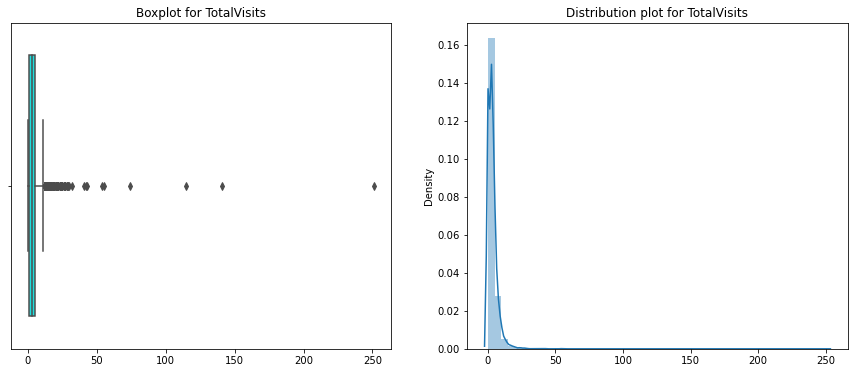

****************************** 
	 Page Views Per Visit 
 ****************************
count    9103.000000
mean        2.370151
std         2.157425
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
97%         7.000000
99%         9.000000
99.5%      11.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64


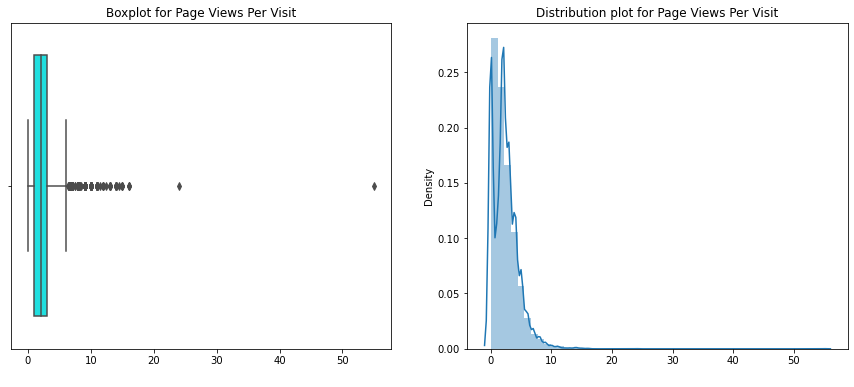

****************************** 
	 Total Time Spent on Website 
 ****************************
count    9103.000000
mean      483.773921
std       545.519186
min         0.000000
25%        12.000000
50%       247.000000
75%       924.000000
90%      1375.000000
95%      1557.000000
97%      1655.000000
99%      1839.000000
99.5%    1932.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


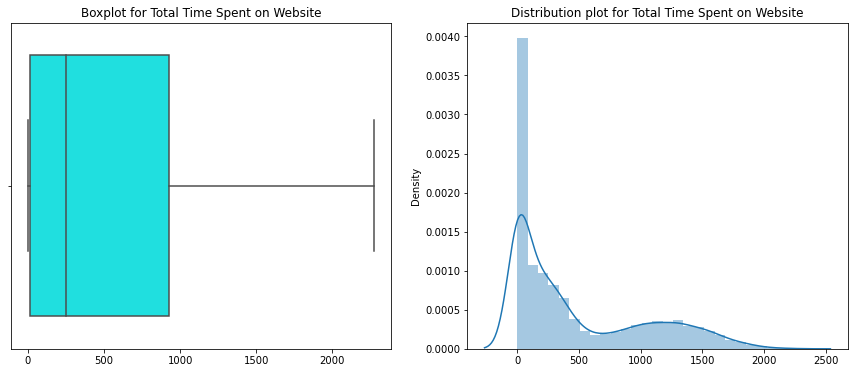

In [27]:
for i in ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']:
    uni_num(i)

We can see some extremely high values in all the 3 variables:
- Some values seem to be extremely high __Outliers__ . Since these values are extremely rare we will drop the rows with such values.
- Since the values might similarly alter in all the 3 varaibles, we will drop in `TotalVisits` column and check for further altercations.
- Based on the above information, 99th information seems to be the best option to consider the top limit of our data by `TotalVisits` column. 
- We will check more percentiles if dropping at 99th percentile doesn't satisfy our requirements.

****************************** 
	 TotalVisits 
 ****************************
count    9020.000000
mean        3.217874
std         2.984750
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
97%        10.000000
99%        13.810000
99.5%      15.000000
max        17.000000
Name: TotalVisits, dtype: float64


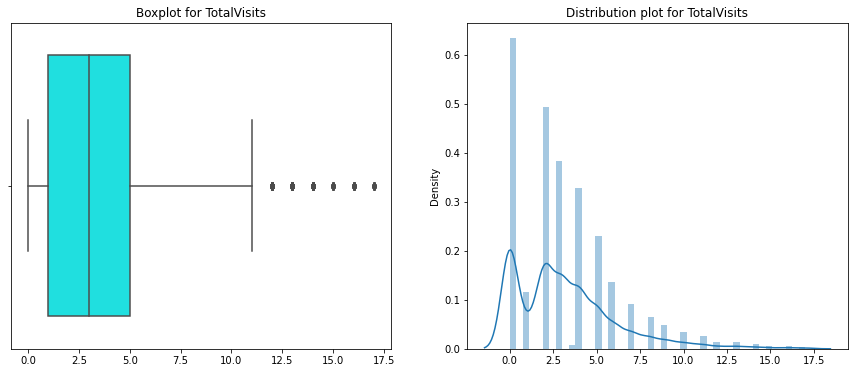

****************************** 
	 Page Views Per Visit 
 ****************************
count    9020.000000
mean        2.344669
std         2.058231
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
97%         7.000000
99%         9.000000
99.5%      10.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64


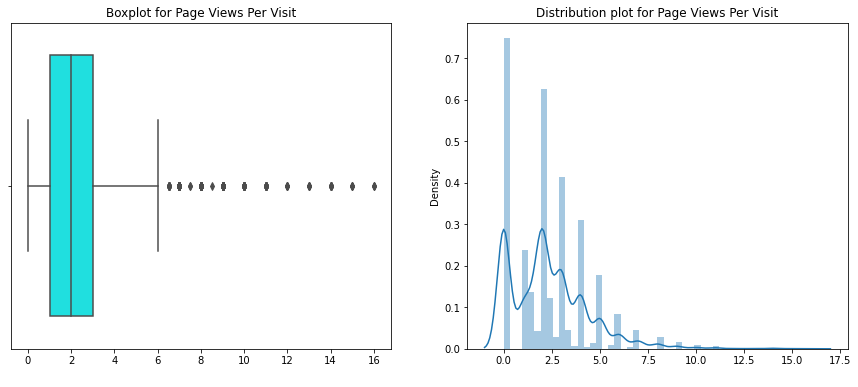

****************************** 
	 Total Time Spent on Website 
 ****************************
count    9020.000000
mean      482.205654
std       545.152773
min         0.000000
25%        10.000000
50%       246.000000
75%       921.000000
90%      1373.000000
95%      1556.050000
97%      1655.000000
99%      1838.620000
99.5%    1932.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


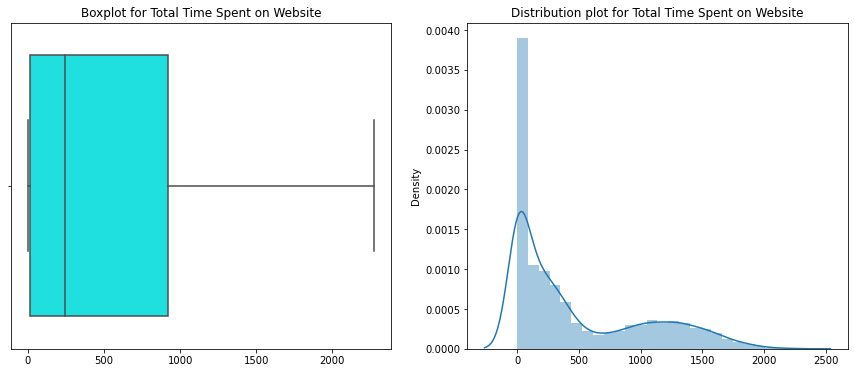

In [28]:
#Checking with 99th percentile
leads_99 = leads[leads['TotalVisits']<=leads['TotalVisits'].quantile(0.99)]

#Checking the 'leads_99' dataset
for i in ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']:
    uni_num(i, leads=leads_99)

#### Outlier Analysis

- By dropping some observations of extremely high values, we got rid of some extreme outliers. The remaining values lie in an acceptable range.
- We will consider this as the __final dataset__ and continue.

#### Scaling
- `Total time spent on website` seems to be the only continuous numerical column.
- We will prefer standardizing the column instead of normalizing to maintain the information of the values on the higher range.

In [29]:
#Finalizing the above change
leads = leads[leads['TotalVisits']<=leads['TotalVisits'].quantile(0.99)]

#### Target Variable Imbalance Check

   Percent  Count
0    62.13   5604
1    37.87   3416


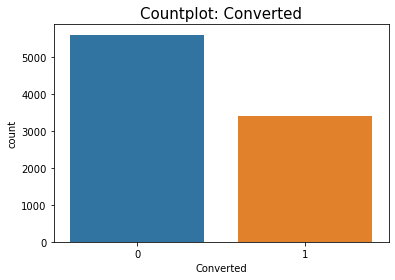

In [30]:
uni_cat('Converted')

In [31]:
#Ratio of data imbalance
round(leads[leads['Converted']==1].shape[0] / leads[leads['Converted']==0].shape[0],3)

0.61

- There is a slight data imbalance. 
- Slightly more data on the `1` category would have been better.
- This ratio is still acceptable.

#### Categorical Variables

                         Percent  Count
Landing Page Submission    53.43   4819
API                        39.51   3564
Lead Add Form               6.64    599
Lead Import                 0.42     38


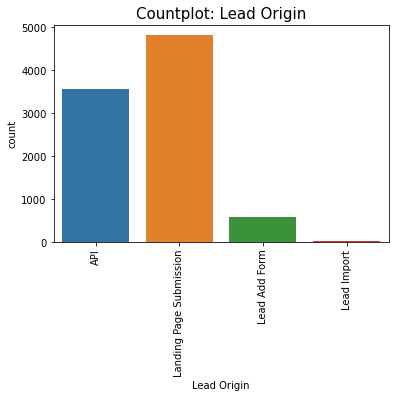

In [32]:
uni_cat('Lead Origin', rot=90)

- 2 categories have very less number of observations
- Due to the first 2 categories, this variable might still be significant.

                   Percent  Count
Google               31.60   2850
Direct Traffic       27.85   2512
Olark Chat           19.43   1753
Organic Search       12.47   1125
Reference             5.11    461
Welingak Website      1.43    129
Referral Sites        1.36    123
Facebook              0.43     39
bing                  0.07      6
google                0.06      5
Click2call            0.04      4
Press_Release         0.02      2
Live Chat             0.02      2
Social Media          0.02      2
NC_EDM                0.01      1
youtubechannel        0.01      1
WeLearn               0.01      1
Pay per Click Ads     0.01      1
testone               0.01      1
welearnblog_Home      0.01      1
blog                  0.01      1


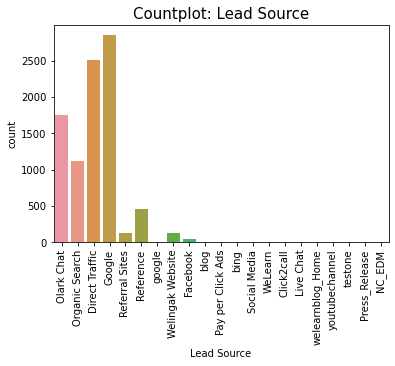

In [33]:
uni_cat('Lead Source', rot=90)

- Many categories seem to have just single values
- All the categories having less than 1.5% observations will be clubbed together as __'Others'__ category.

                Percent  Count
Google            31.60   2850
Direct Traffic    27.85   2512
Olark Chat        19.43   1753
Organic Search    12.47   1125
Reference          5.11    461
Others             3.54    319


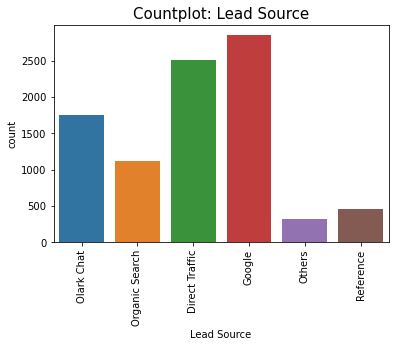

In [34]:
#Making the above change
leads['Lead Source'] = leads['Lead Source'].apply(lambda x: 'Others' if x not in ['Olark Chat','Organic Search','Direct Traffic','Google','Reference'] else x)

#Validating the above changes
uni_cat('Lead Source', rot=90)

     Percent  Count
No      92.2   8316
Yes      7.8    704


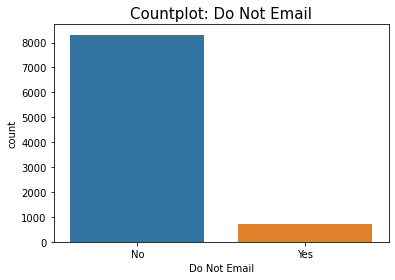

In [35]:
uni_cat('Do Not Email')

- There is huge imbalance between both categories.

                              Percent  Count
Email Opened                    37.80   3410
SMS Sent                        30.01   2707
Olark Chat Conversation         10.76    971
Page Visited on Website          6.67    602
Converted to Lead                4.75    428
Email Bounced                    3.55    320
Email Link Clicked               2.95    266
Form Submitted on Website        1.27    115
Unreachable                      1.03     93
Unsubscribed                     0.65     59
Had a Phone Conversation         0.32     29
Approached upfront               0.10      9
View in browser link Clicked     0.06      5
Email Marked Spam                0.02      2
Email Received                   0.02      2
Resubscribed to emails           0.01      1
Visited Booth in Tradeshow       0.01      1


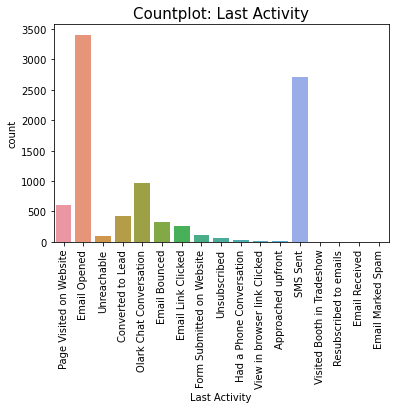

In [36]:
uni_cat('Last Activity',rot=90)

- Many categories seem to hold extremely low number of observations (<4%), they will be clubbed together as __'Others'__ category.

                         Percent  Count
Email Opened               37.80   3410
SMS Sent                   30.01   2707
Olark Chat Conversation    10.76    971
Others                     10.00    902
Page Visited on Website     6.67    602
Converted to Lead           4.75    428


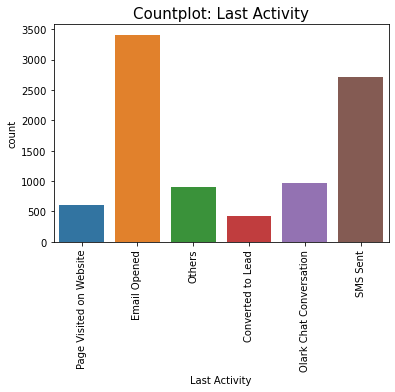

In [37]:
#Making the above changes
leads['Last Activity'] = leads['Last Activity'].apply(lambda x: 'Others' if x not in ['Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website','Converted to Lead'] else x)

#Validating the above changes
uni_cat('Last Activity',rot=90)

         Percent  Count
India      71.08   6411
Unknown    25.78   2325
Others      3.15    284


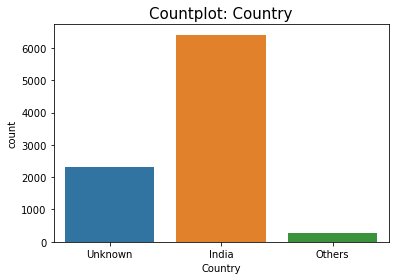

In [38]:
uni_cat('Country')

- The distribubtion here is extremely biased towards `India`
- The countries marked as `Unknown` stand next
- The rest of the countries have very low number of observations

                      Percent  Count
Unemployed              60.28   5437
Unknown                 29.62   2672
Working Professional     7.49    676
Others                   2.61    235


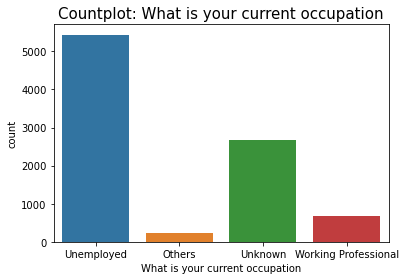

In [39]:
uni_cat('What is your current occupation')

- While `Unemployed` holds the highest number of values, `Unknown` stands next.
- All other categories have low number of observations.

                         Percent  Count
Better Career Prospects    70.16   6328
Unknown                    29.82   2690
Other                       0.02      2


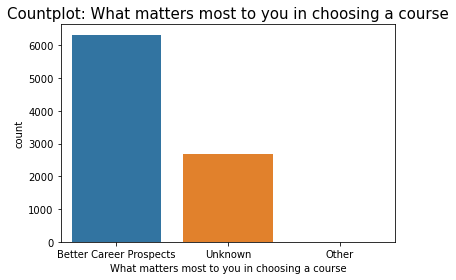

In [40]:
uni_cat('What matters most to you in choosing a course')

- There are only 2 significant categories in this variable.
- The other 2 categories have just __1__ observation each, which makes this variable (after creating dummies) extremely insignificant for the final model.

     Percent  Count
No     68.55   6183
Yes    31.45   2837


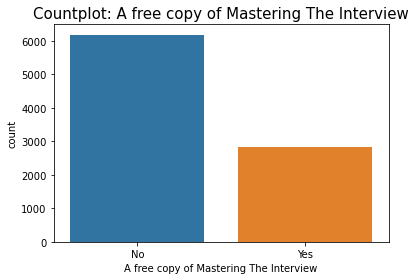

In [41]:
uni_cat('A free copy of Mastering The Interview')

- There seems to be a slight imbalance in the categories of this variable
- Although, the imbalance can still be considered to be significant enough.

                              Percent  Count
Modified                        36.35   3279
Email Opened                    31.08   2803
SMS Sent                        23.71   2139
Page Visited on Website          3.20    289
Olark Chat Conversation          2.02    182
Email Link Clicked               1.91    172
Email Bounced                    0.65     59
Unsubscribed                     0.50     45
Unreachable                      0.35     32
Had a Phone Conversation         0.14     13
Email Marked Spam                0.02      2
Resubscribed to emails           0.01      1
View in browser link Clicked     0.01      1
Email Received                   0.01      1
Form Submitted on Website        0.01      1
Approached upfront               0.01      1


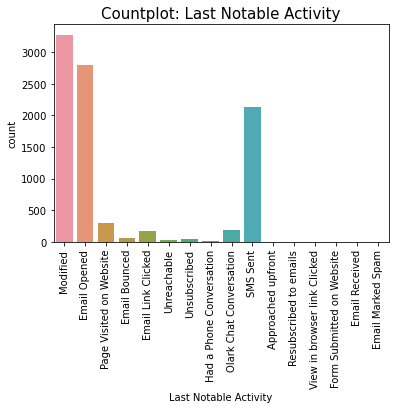

In [42]:
uni_cat('Last Notable Activity', rot=90)

- Many categories here have extremely low number of observations(<4%). These will be clubbed into a single category __'Others'__.

              Percent  Count
Modified        36.35   3279
Email Opened    31.08   2803
SMS Sent        23.71   2139
Others           8.86    799


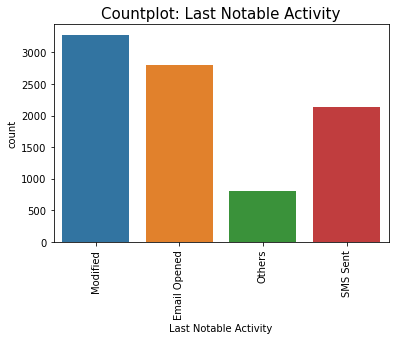

In [43]:
#Making the above change
leads['Last Notable Activity'] = leads['Last Notable Activity'].apply(lambda x: 'Others' if x not in ['Modified','Email Opened','SMS Sent'] else x)

#Valdiating above changes
uni_cat('Last Notable Activity', rot=90)

           Percent  Count
0.000000     23.96   2161
2.000000     18.61   1679
3.000000     14.48   1306
4.000000     12.42   1120
5.000000      8.68    783
6.000000      5.17    466
1.000000      4.38    395
7.000000      3.43    309
8.000000      2.48    224
9.000000      1.82    164
10.000000     1.26    114
11.000000     0.95     86
13.000000     0.53     48
12.000000     0.50     45
14.000000     0.40     36
3.456028      0.32     29
16.000000     0.23     21
15.000000     0.20     18
17.000000     0.18     16


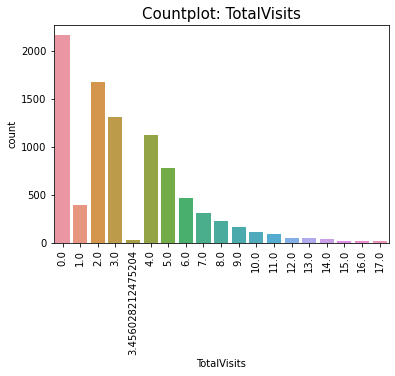

In [44]:
uni_cat('TotalVisits', rot=90)

- Most customers seems to have visited the website 0 times
- Customers who visited just once seem to be low in number.
- There seems to be a gradual decline in the rest of the website visits.

### Bivariate Analysis

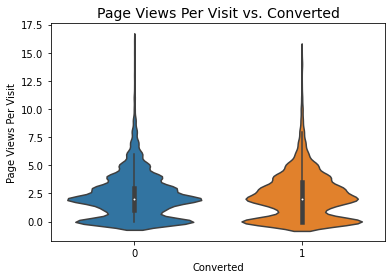

In [46]:
sns.violinplot(x='Converted', y='Page Views Per Visit', data=leads)
plt.title('Page Views Per Visit vs. Converted', fontsize=14)
plt.show()

- The distribution for both the `Converted` values can be seen high at __0__ and __2__.
- It can also be observed that 2 page views has slightly lower distribution in __converted leads__ than in __non-converted leads.__

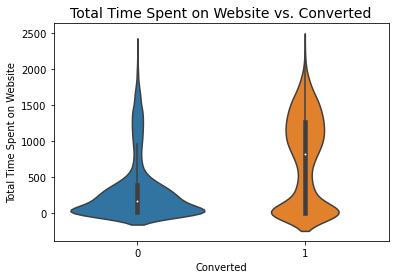

In [47]:
sns.violinplot(x='Converted', y='Total Time Spent on Website', data=leads)
plt.title('Total Time Spent on Website vs. Converted', fontsize=14)
plt.show()

- Most of the __non-converted leads__ have 0 time spent on the website
- The distribution at 0 is much more higher for __non-converted leads__ than __converted leads__.

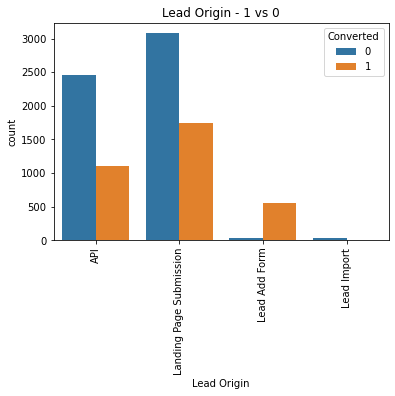

In [48]:
#Lead Origin - 1 vs 0
sns.countplot(x='Lead Origin', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.title('Lead Origin - 1 vs 0')
plt.show()

- The __non-converted leads__ have much higher observations in `API` and `Landing Page Submission` than __converted leads__.
- Although `Lead Add Form` seems to cause higher __converted leads__.


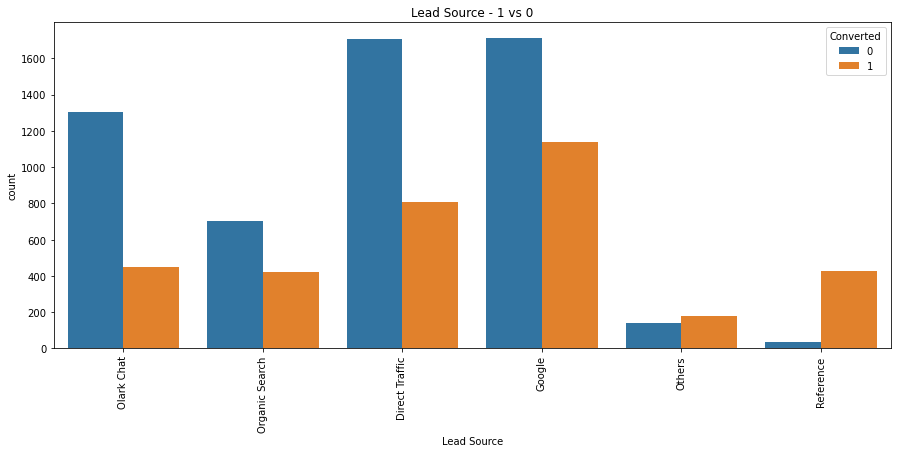

In [49]:
#Lead Source - 1 vs 0
plt.figure(figsize=(15,6))
sns.countplot(x='Lead Source', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.title('Lead Source - 1 vs 0')
plt.show()

- `Reference` seems to create many __converted leads__. 
- Most of our __non-converted leads__ belong to:
    - `Olark Chat` (highest)
    - `Organic Search`
    - `Direct Traffic`
    - `Google`

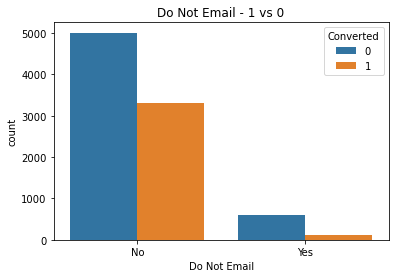

In [50]:
#Do Not Email - 1 vs 0
sns.countplot(x='Do Not Email', data=leads, hue='Converted')
plt.title('Do Not Email - 1 vs 0')
plt.show()

- In both the cases the distribution seems to be similar in terms of __conversion of leads__.

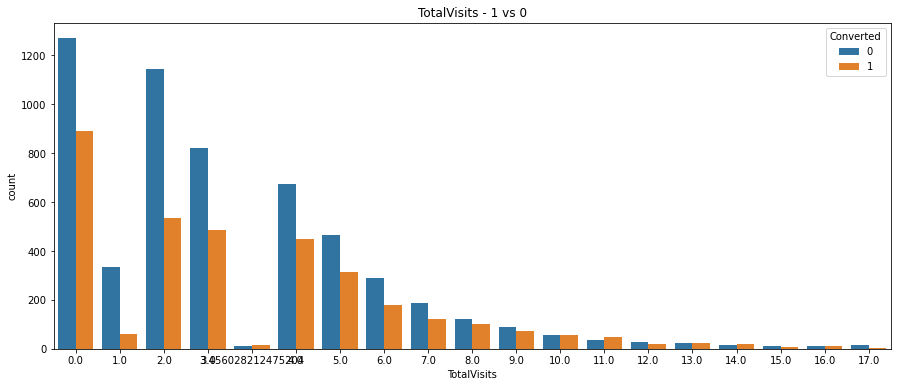

In [51]:
#TotalVisits - 1 vs 0
plt.figure(figsize=(15,6))
sns.countplot(x='TotalVisits', data=leads, hue='Converted')
plt.title('TotalVisits - 1 vs 0')
plt.show()

- The ratio of __conversion__ seems to be almost similar in all __`TotalVisits`__ values except `1.0`, it seems to have much higher number of observations of __non-converted leads__ than __converted leads__.
- A slight increase can be seen in __converted leads__ as the count of __`TotalVisits`__ increases.

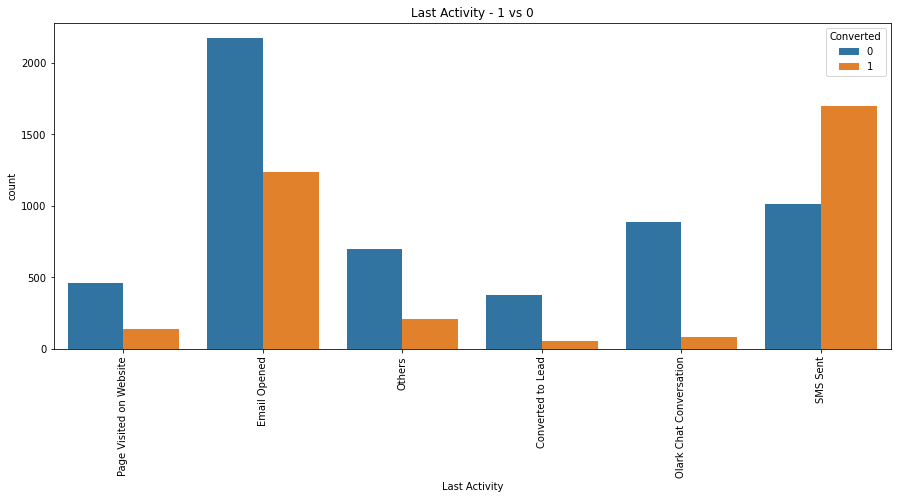

In [52]:
#Last Activity - 1 vs 0
plt.figure(figsize=(15,6))
sns.countplot(x='Last Activity', data=leads, hue='Converted')
plt.title('Last Activity - 1 vs 0')
plt.xticks(rotation=90)
plt.show()

- In almost all the cases we can observe that __non-converted leads__ have much higher ratio than __converted leads__ except `SMS Sent` category. 

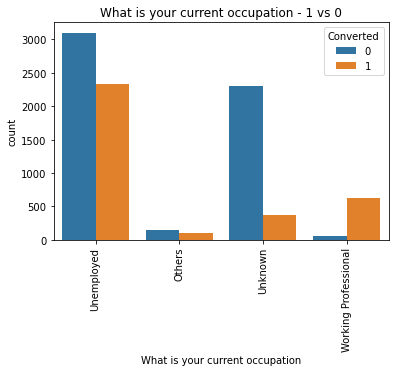

In [53]:
#What is your current occupation - 1 vs 0
sns.countplot(x='What is your current occupation', data=leads, hue='Converted')
plt.title('What is your current occupation - 1 vs 0')
plt.xticks(rotation=90)
plt.show()

- In the case where the current occupation is `Unknown` there seems to be extremely high observations of __non-converted leads__ than __converted leads__.
- `Working Professional` seems to be a pretty significant factor for identifying __converted leads__
- `Unemployed` category has a ratio of __non-converted leads__ higher than __converted leads__ by a small fraction.

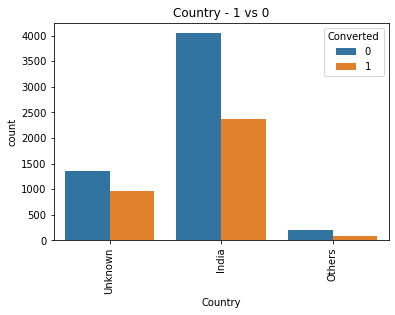

In [54]:
#Country - 1 vs 0
sns.countplot(x='Country', data=leads, hue='Converted')
plt.title('Country - 1 vs 0')
plt.xticks(rotation=90)
plt.show()

- Most of our data seems to be have `India` or `Unknown`, where the __conversion ratio__ has similar pattern of __non-converted leads__ being higher than __converted leads__.

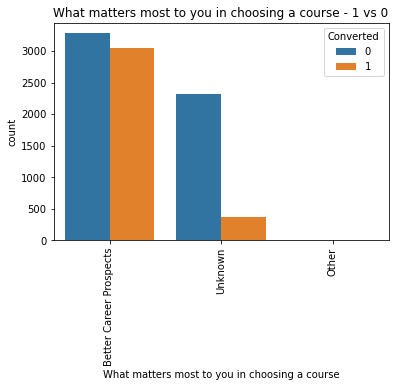

In [55]:
#Country - 1 vs 0
sns.countplot(x='What matters most to you in choosing a course', data=leads, hue='Converted')
plt.title('What matters most to you in choosing a course - 1 vs 0')
plt.xticks(rotation=90)
plt.show()

- `Unknown` category suggests that if there is no entry filled that means the chances of the lead being __non-converted__ is higher.
- `Better Career Prospects` seem to hold almost similar number of observations with __non-converted leads__ being slightly higher than __converted leads__

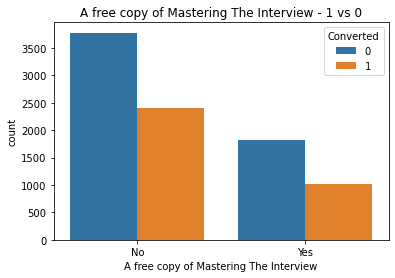

In [56]:
#A free copy of Mastering The Interview - 1 vs 0
sns.countplot(x='A free copy of Mastering The Interview', data=leads, hue='Converted')
plt.title('A free copy of Mastering The Interview - 1 vs 0')
plt.show()

- The __conversion ratio__ in both the cases seems to be same irrespective of getting the free copy.

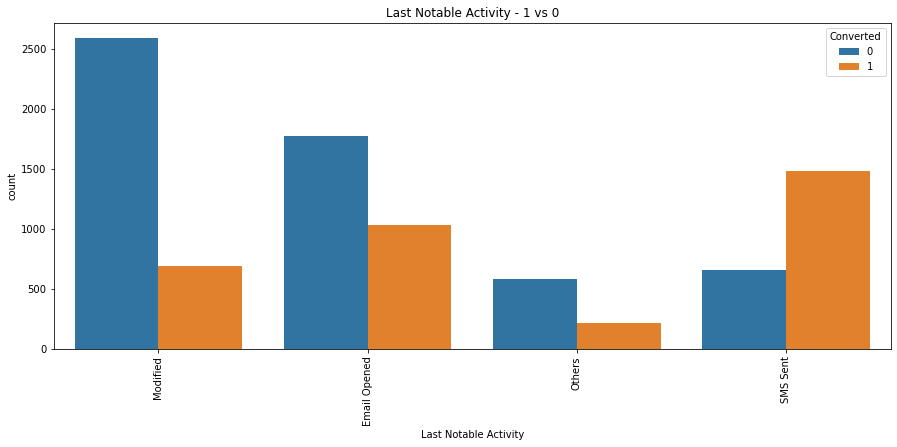

In [57]:
#Last Notable Activity - 1 vs 0
plt.figure(figsize=(15,6))
sns.countplot(x='Last Notable Activity', data=leads, hue='Converted')
plt.title('Last Notable Activity - 1 vs 0')
plt.xticks(rotation=90)
plt.show()

- The results in `Last Notable Activity` seems to be similar as that of `Last Activity` which is:
    
    
In almost all the cases we can observe that __non-converted leads__ have much higher ratio than __converted leads__ except __SMS Sent__ category.

### Multivariate Analysis

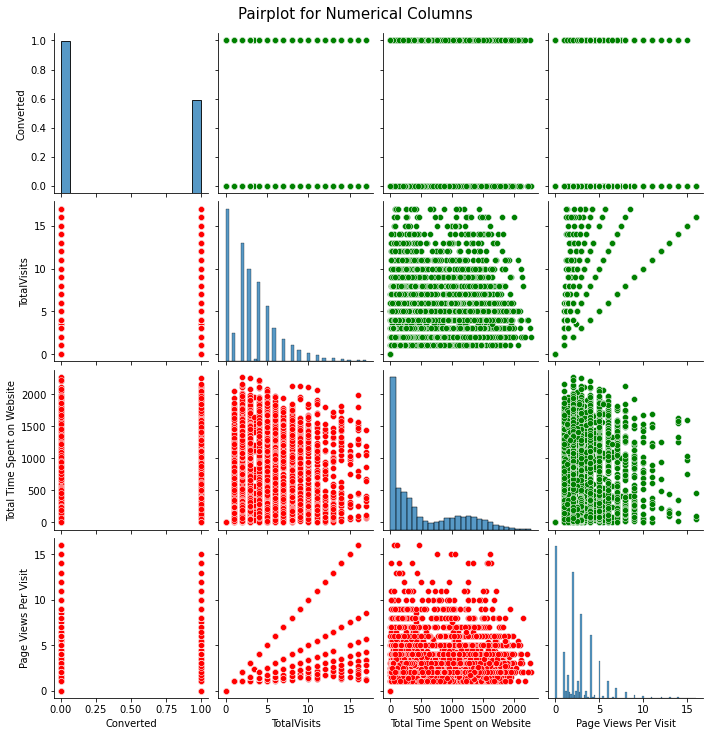

In [58]:
pairplot = sns.pairplot(leads)
pairplot.map_upper(sns.scatterplot,color='green')
pairplot.map_lower(sns.scatterplot,color='red')
plt.suptitle('Pairplot for Numerical Columns', fontsize=15, y=1.02)
plt.show()

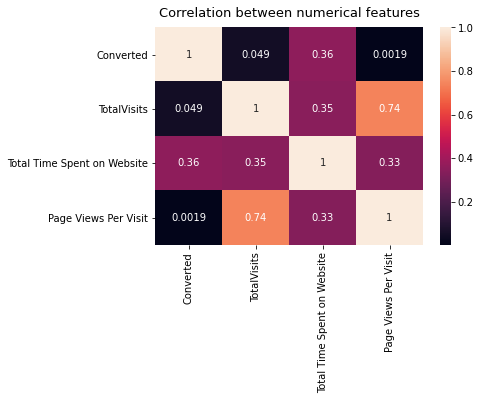

In [59]:
sns.heatmap(leads.corr(), annot=True)
plt.title('Correlation between numerical features', fontsize=13, y=1.02)
plt.show()

All the features seem to have acceptable correlation values, except:
- __`TotalVisits`__
- __`Page Views Per Visit`__.


We will take a decision of which of the above columns to drop based on the __p value__ and __VIF value__.

## Data Preparation

In [60]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Others,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,Modified


In [61]:
#Converting binary categorical variables to [0,1] values
binary_cols = [i for i in leads.columns if leads[i].nunique()==2]
leads[binary_cols] = leads[binary_cols].replace({'No':0,'Yes':1})

#Validating above changes
for i in leads[binary_cols]:
    print('Column:',i)
    print('*'*35)
    print(leads[i].value_counts(),'\n')

Column: Do Not Email
***********************************
0    8316
1     704
Name: Do Not Email, dtype: int64 

Column: Converted
***********************************
0    5604
1    3416
Name: Converted, dtype: int64 

Column: A free copy of Mastering The Interview
***********************************
0    6183
1    2837
Name: A free copy of Mastering The Interview, dtype: int64 



In [62]:
#List of columns to be dummified
cols_to_dummy = leads.select_dtypes('object').columns.tolist()

#Creating dummy columns
dummies = pd.get_dummies(leads.select_dtypes('object'), drop_first=True)

#Adding dummy columns to main dataframe 'leads'
leads[dummies.columns] = dummies

#Dropping original columns
leads.drop(cols_to_dummy, axis=1, inplace=True)

#Checking the dataframe
print(leads.shape)
leads.head()

(9020, 29)


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Country_Unknown,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [63]:
#Dividing into dependant(Y) and independant(X) datasets
y = leads['Converted']
X = leads.drop('Converted', axis=1)

#Dividing into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

#Validating the above
print('Shapes of datasets:\n'+'*'*20)
print('X_train:',X_train.shape,'\nX test:',X_test.shape,'\ny train:',y_train.shape,'\ny test:',y_test.shape)

Shapes of datasets:
********************
X_train: (6314, 28) 
X test: (2706, 28) 
y train: (6314,) 
y test: (2706,)


In [64]:
#standardizing values
scaler = StandardScaler()

#Fitting and transforming on X_train column
X_train['Total Time Spent on Website'] = scaler.fit_transform(np.array(X_train['Total Time Spent on Website']).reshape(-1,1))

#Transforming on X_test column
X_test['Total Time Spent on Website'] = scaler.transform(np.array(X_test['Total Time Spent on Website']).reshape(-1,1))

## Model Building

In [65]:
#Function for checking VIF
def vif_check(X_train):
    vif = pd.DataFrame()
    vif['VIF'] = [VIF(X_train.values,i) for i in range(len(X_train.columns))]
    vif['features'] = X_train.columns

    return vif.sort_values('VIF', ascending=False)

In [66]:
#RFE with 15 columns on X_train_sm
model = LogisticRegression()
rfe = RFE(model, 15)
rfe.fit(X_train, y_train)

#RFE columns - support and ranking
pd.DataFrame({'Features':X_train.columns, 'Support':rfe.support_, 'Rank':rfe.ranking_}).sort_values(by='Rank').head(15)

,Features,Support,Rank
0,Do Not Email,True,1
24,What matters most to you in choosing a course_...,True,1
22,What is your current occupation_Working Profes...,True,1
19,Country_Unknown,True,1
17,Last Activity_SMS Sent,True,1
16,Last Activity_Page Visited on Website,True,1
15,Last Activity_Others,True,1
14,Last Activity_Olark Chat Conversation,True,1
26,Last Notable Activity_Others,True,1
11,Lead Source_Others,True,1


In [67]:
#Adding constant to the data for statsmodels library
X_train_sm = sm.add_constant(X_train[X_train.columns[rfe.support_]])

#Building the model
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.7
Date:                Sun, 09 May 2021   Deviance:                       4975.3
Time:                        17:42:38   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.5616      0.224    -11.426      0.000      -3.001      -2.122
Do Not Email                                             -1.4952      0.183     -8.151      0.000      -1.855      -1.136
Total Time Spent on Website                               1.1598      0.042     27.473      0.000       1.077       1.242
Lead Origin_Lead Add Form                                 3.5037      0.308     11.391      0.000       2.901       4.107
Lead Source_Olark Chat                                    0.8337      0.241      3.454      0.001       0.361       1.307
Lead Source_Others                                        0.3731      0.228      1.638      0.101      -0.073       0.820
Last Activity_Email Opened                                1.5180      0.228      6.650      0.000       1.071       1.965
Last Activity_Olark Chat Conversation                    -0.2055      0.281     -0.732      0.464      -0.755       0.344
Last Activity_Others                                      0.9329      0.271      3.441      0.001       0.401       1.464
Last Activity_Page Visited on Website                     0.6340      0.281      2.256      0.024       0.083       1.185
Last Activity_SMS Sent                                    1.7896      0.261      6.855      0.000       1.278       2.301
Country_Unknown                                           0.5333      0.240      2.223      0.026       0.063       1.003
What is your current occupation_Working Professional      2.5062      0.188     13.343      0.000       2.138       2.874
What matters most to you in choosing a course_Unknown    -1.1268      0.089    -12.596      0.000      -1.302      -0.952
Last Notable Activity_Others                              0.7346      0.169      4.358      0.000       0.404       1.065
Last Notable Activity_SMS Sent                            1.1525      0.154      7.481      0.000       0.851       1.454
=========================================================================================================================
"""

In [68]:
#Dropping 'Last Activity_Olark Chat Conversation' due to high P-Value
X_train_sm.drop('Last Activity_Olark Chat Conversation', axis=1, inplace=True)

#Building the model
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.9
Date:                Sun, 09 May 2021   Deviance:                       4975.9
Time:                        17:42:52   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.6914      0.142    -18.969      0.000      -2.970      -2.413
Do Not Email                                             -1.4970      0.183     -8.163      0.000      -1.856      -1.138
Total Time Spent on Website                               1.1599      0.042     27.460      0.000       1.077       1.243
Lead Origin_Lead Add Form                                 3.5017      0.308     11.383      0.000       2.899       4.105
Lead Source_Olark Chat                                    0.8218      0.241      3.411      0.001       0.350       1.294
Lead Source_Others                                        0.3685      0.228      1.618      0.106      -0.078       0.815
Last Activity_Email Opened                                1.6504      0.144     11.487      0.000       1.369       1.932
Last Activity_Others                                      1.0751      0.192      5.600      0.000       0.699       1.451
Last Activity_Page Visited on Website                     0.7760      0.206      3.768      0.000       0.372       1.180
Last Activity_SMS Sent                                    1.9212      0.192      9.981      0.000       1.544       2.299
Country_Unknown                                           0.5322      0.240      2.217      0.027       0.062       1.003
What is your current occupation_Working Professional      2.5165      0.188     13.395      0.000       2.148       2.885
What matters most to you in choosing a course_Unknown    -1.1276      0.089    -12.608      0.000      -1.303      -0.952
Last Notable Activity_Others                              0.7148      0.166      4.311      0.000       0.390       1.040
Last Notable Activity_SMS Sent                            1.1529      0.154      7.483      0.000       0.851       1.455
=========================================================================================================================
"""

In [69]:
#Dropping 'Lead Source_Others' due to high P-Value
X_train_sm.drop('Lead Source_Others', axis=1, inplace=True)

#Building the model
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2489.2
Date:                Sun, 09 May 2021   Deviance:                       4978.4
Time:                        17:42:57   Pearson chi2:                 6.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.6783      0.141    -18.939      0.000      -2.955      -2.401
Do Not Email                                             -1.5021      0.183     -8.202      0.000      -1.861      -1.143
Total Time Spent on Website                               1.1570      0.042     27.443      0.000       1.074       1.240
Lead Origin_Lead Add Form                                 3.4890      0.309     11.303      0.000       2.884       4.094
Lead Source_Olark Chat                                    0.7204      0.234      3.074      0.002       0.261       1.180
Last Activity_Email Opened                                1.6473      0.143     11.481      0.000       1.366       1.928
Last Activity_Others                                      1.0783      0.192      5.620      0.000       0.702       1.454
Last Activity_Page Visited on Website                     0.7820      0.206      3.801      0.000       0.379       1.185
Last Activity_SMS Sent                                    1.9202      0.192      9.985      0.000       1.543       2.297
Country_Unknown                                           0.6269      0.235      2.667      0.008       0.166       1.088
What is your current occupation_Working Professional      2.5113      0.188     13.373      0.000       2.143       2.879
What matters most to you in choosing a course_Unknown    -1.1266      0.089    -12.596      0.000      -1.302      -0.951
Last Notable Activity_Others                              0.7117      0.166      4.294      0.000       0.387       1.036
Last Notable Activity_SMS Sent                            1.1458      0.154      7.446      0.000       0.844       1.447
=========================================================================================================================
"""

In [70]:
#Checking VIF
vif_check(X_train_sm)

,VIF,features
0,9.035072,const
9,8.890475,Country_Unknown
4,7.265970,Lead Source_Olark Chat
8,4.909766,Last Activity_SMS Sent
13,3.697137,Last Notable Activity_SMS Sent
3,3.605858,Lead Origin_Lead Add Form
5,2.336156,Last Activity_Email Opened
6,1.901241,Last Activity_Others
7,1.576006,Last Activity_Page Visited on Website
12,1.413835,Last Notable Activity_Others


In [71]:
#Dropping 'Country_Unknown' due to high VIF-Value
X_train_sm.drop('Country_Unknown', axis=1, inplace=True)

#Building the model
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2492.7
Date:                Sun, 09 May 2021   Deviance:                       4985.4
Time:                        17:43:03   Pearson chi2:                 6.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.6568      0.141    -18.789      0.000      -2.934      -2.380
Do Not Email                                             -1.4915      0.183     -8.156      0.000      -1.850      -1.133
Total Time Spent on Website                               1.1408      0.042     27.421      0.000       1.059       1.222
Lead Origin_Lead Add Form                                 4.0704      0.221     18.405      0.000       3.637       4.504
Lead Source_Olark Chat                                    1.2804      0.107     12.010      0.000       1.071       1.489
Last Activity_Email Opened                                1.6435      0.144     11.431      0.000       1.362       1.925
Last Activity_Others                                      1.0616      0.192      5.539      0.000       0.686       1.437
Last Activity_Page Visited on Website                     0.7577      0.206      3.683      0.000       0.354       1.161
Last Activity_SMS Sent                                    1.9265      0.193     10.003      0.000       1.549       2.304
What is your current occupation_Working Professional      2.5203      0.188     13.415      0.000       2.152       2.889
What matters most to you in choosing a course_Unknown    -1.1232      0.089    -12.568      0.000      -1.298      -0.948
Last Notable Activity_Others                              0.7116      0.166      4.294      0.000       0.387       1.036
Last Notable Activity_SMS Sent                            1.1304      0.154      7.352      0.000       0.829       1.432
=========================================================================================================================
"""

In [72]:
#Checking VIF
vif_check(X_train_sm)

,VIF,features
0,8.985879,const
8,4.909319,Last Activity_SMS Sent
12,3.694594,Last Notable Activity_SMS Sent
5,2.334244,Last Activity_Email Opened
6,1.897038,Last Activity_Others
7,1.571746,Last Activity_Page Visited on Website
11,1.413833,Last Notable Activity_Others
4,1.333167,Lead Source_Olark Chat
2,1.306412,Total Time Spent on Website
1,1.290386,Do Not Email


In [73]:
#Dropping 'Last Activity_SMS Sent' due to high VIF-Value
X_train_sm.drop('Last Activity_SMS Sent', axis=1, inplace=True)

#Building the model
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.0
Date:                Sun, 09 May 2021   Deviance:                       5088.1
Time:                        17:43:11   Pearson chi2:                 6.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.8744      0.100    -18.759      0.000      -2.070      -1.679
Do Not Email                                             -1.4249      0.183     -7.780      0.000      -1.784      -1.066
Total Time Spent on Website                               1.1465      0.041     27.747      0.000       1.066       1.228
Lead Origin_Lead Add Form                                 4.2624      0.224     19.048      0.000       3.824       4.701
Lead Source_Olark Chat                                    1.1505      0.104     11.039      0.000       0.946       1.355
Last Activity_Email Opened                                0.8711      0.105      8.324      0.000       0.666       1.076
Last Activity_Others                                      0.3809      0.169      2.257      0.024       0.050       0.712
Last Activity_Page Visited on Website                     0.0955      0.184      0.518      0.604      -0.266       0.457
What is your current occupation_Working Professional      2.4844      0.184     13.474      0.000       2.123       2.846
What matters most to you in choosing a course_Unknown    -1.0783      0.088    -12.225      0.000      -1.251      -0.905
Last Notable Activity_Others                              0.4779      0.158      3.024      0.002       0.168       0.788
Last Notable Activity_SMS Sent                            2.2814      0.114     20.033      0.000       2.058       2.505
=========================================================================================================================
"""

In [74]:
#Dropping 'Last Activity_Page Visited on Website' due to high p-Value
X_train_sm.drop('Last Activity_Page Visited on Website', axis=1, inplace=True)

#Building the model
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.2
Date:                Sun, 09 May 2021   Deviance:                       5088.4
Time:                        17:43:17   Pearson chi2:                 6.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.8542      0.092    -20.204      0.000      -2.034      -1.674
Do Not Email                                             -1.4215      0.183     -7.758      0.000      -1.781      -1.062
Total Time Spent on Website                               1.1470      0.041     27.752      0.000       1.066       1.228
Lead Origin_Lead Add Form                                 4.2578      0.223     19.055      0.000       3.820       4.696
Lead Source_Olark Chat                                    1.1445      0.104     11.055      0.000       0.942       1.347
Last Activity_Email Opened                                0.8526      0.098      8.687      0.000       0.660       1.045
Last Activity_Others                                      0.3481      0.156      2.226      0.026       0.042       0.655
What is your current occupation_Working Professional      2.4830      0.184     13.463      0.000       2.122       2.844
What matters most to you in choosing a course_Unknown    -1.0803      0.088    -12.259      0.000      -1.253      -0.908
Last Notable Activity_Others                              0.5078      0.147      3.452      0.001       0.219       0.796
Last Notable Activity_SMS Sent                            2.2625      0.108     21.011      0.000       2.051       2.474
=========================================================================================================================
"""

In [87]:
#Dropping 'Last Activity_Others' due to high p-Value
X_train_sm.drop('Last Activity_Others', axis=1, inplace=True)

#Building the model
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.6
Date:                Sun, 09 May 2021   Deviance:                       5093.2
Time:                        17:49:09   Pearson chi2:                 6.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.7927      0.087    -20.625      0.000      -1.963      -1.622
Do Not Email                                             -1.3242      0.179     -7.417      0.000      -1.674      -0.974
Total Time Spent on Website                               1.1457      0.041     27.746      0.000       1.065       1.227
Lead Origin_Lead Add Form                                 4.2526      0.223     19.067      0.000       3.815       4.690
Lead Source_Olark Chat                                    1.1353      0.103     10.984      0.000       0.933       1.338
Last Activity_Email Opened                                0.7945      0.094      8.443      0.000       0.610       0.979
What is your current occupation_Working Professional      2.4886      0.184     13.493      0.000       2.127       2.850
What matters most to you in choosing a course_Unknown    -1.0881      0.088    -12.364      0.000      -1.261      -0.916
Last Notable Activity_Others                              0.5794      0.143      4.045      0.000       0.299       0.860
Last Notable Activity_SMS Sent                            2.1979      0.103     21.308      0.000       1.996       2.400
=========================================================================================================================
"""

In [88]:
#Checking VIF
vif_check(X_train_sm)

,VIF,features
0,5.108903,const
5,1.512986,Last Activity_Email Opened
9,1.506257,Last Notable Activity_SMS Sent
2,1.303040,Total Time Spent on Website
4,1.264217,Lead Source_Olark Chat
8,1.181481,Last Notable Activity_Others
3,1.161998,Lead Origin_Lead Add Form
7,1.142132,What matters most to you in choosing a course_...
1,1.087498,Do Not Email
6,1.079685,What is your current occupation_Working Profes...


The above model has low p-values for all the features and acceptable VIF values. We will consider this as the final modela and evaluate ahead.

## Model Evaluation

In [89]:
#Building a dataframe to check the predicted values, probabilities and evaluate different thresholds
pred = pd.DataFrame()

#Ground truth values
pred['True_values'] = y_train

#Predicted probabilities
pred['Predicted_prob'] = model.predict(X_train_sm)

#Final predictions based on different thresholds
thresh = [0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in thresh:
    pred[str(i)] = pred['Predicted_prob'].apply(lambda x: 1 if x>i else 0)

#Checking the final result
pred.head()

,True_values,Predicted_prob,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9
2864,0,0.789827,1,1,1,1,1,1,1,1,0,0
6824,1,0.663981,1,1,1,1,1,1,1,0,0,0
7257,0,0.798885,1,1,1,1,1,1,1,1,0,0
8325,1,0.910499,1,1,1,1,1,1,1,1,1,1
5943,0,0.121595,1,0,0,0,0,0,0,0,0,0


#### ROC

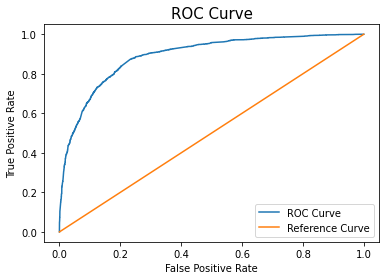

ROC AUC Score: 0.89


In [90]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(pred['True_values'], pred['Predicted_prob'])
plt.plot(fpr,tpr, label='ROC Curve')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1), label='Reference Curve')
plt.title('ROC Curve', fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#ROC AUC Score
print('ROC AUC Score:',round(roc_auc_score(pred['True_values'], pred['Predicted_prob']),2))

Based on the above, we can conclusively say that our model is able to generalize well and is good enough based on the __ROC AUC Score__ of `0.89`

#### Sensitivity vs. Specificity vs. Accuracy

,Threshold,Accuracy,Sensitivity,Specificity
0,0.10,0.612449,0.972222,0.395378
1,0.20,0.771302,0.907828,0.688928
2,0.30,0.812639,0.836279,0.798375
3,0.35,0.812639,0.814815,0.811326
4,0.40,0.818023,0.775673,0.843575
5,0.50,0.818815,0.702441,0.889030
6,0.60,0.809154,0.630051,0.917217
7,0.70,0.786348,0.515152,0.949975
8,0.80,0.770668,0.439815,0.970289
9,0.90,0.729807,0.305135,0.986034


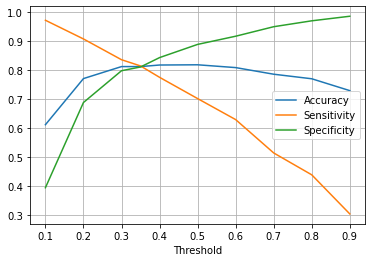

In [91]:
#Temp variable for index
temp = 0

#Dataframe for storing the metrics
pred_metrics = pd.DataFrame(columns=['Threshold','Accuracy','Sensitivity','Specificity'])

#Calculating and appending metric values for the below threshold levels
thresh = [0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in thresh:
    cm = confusion_matrix(pred['True_values'], pred[str(i)])
    tn = cm[0,0]
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]

    accuracy = (tp+tn)/(cm.sum())
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)

    pred_metrics.loc[temp] = [i,accuracy,sensitivity,specificity]
    temp = temp+1
    
#Plotting and printing the metric values
pred_metrics.plot.line(x = 'Threshold', y=['Accuracy','Sensitivity','Specificity'], grid=True)
pred_metrics

From the above plot, _most optimum threshold_ seems to be at `0.35`. But based on the business requirement, we need higher __sensitivity__, so `0.3` seems to be a better threshold.

#### Precision vs. Recall

,Threshold,Precision,Recall
0,0.10,0.492432,0.972222
1,0.20,0.637788,0.907828
2,0.30,0.714491,0.836279
3,0.35,0.722658,0.814815
4,0.40,0.749492,0.775673
5,0.50,0.792498,0.702441
6,0.60,0.821174,0.630051
7,0.70,0.861365,0.515152
8,0.80,0.899312,0.439815
9,0.90,0.929487,0.305135


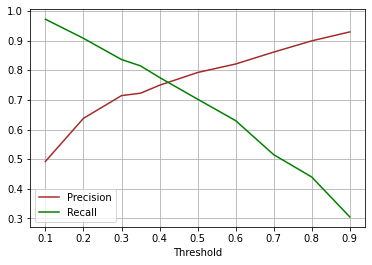

In [92]:
#Temp variable for index
temp = 0

#Dataframe for storing the metrics
pred_metrics = pd.DataFrame(columns=['Threshold','Precision','Recall'])

#Calculating and appending metric values for the below threshold levels
thresh = [0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in thresh:
    cm = confusion_matrix(pred['True_values'], pred[str(i)])
    tn = cm[0,0]
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)

    pred_metrics.loc[temp] = [i,precision,recall]
    temp = temp+1
    
#Plotting and printing the metric values
pred_metrics.plot.line(x = 'Threshold', y=['Precision','Recall'], color=['brown','green'], grid=True)
pred_metrics

We get to see the optimum threshold value here to be close to `0.4`. But based on the business requirements as mentioned by the CEO, we need a 80% conversion rate.


Hence, we will choose the threshold value where we get __recall__ to be atleast `80%`.

In this case, we get `80%` __recall__ at `0.3` as the threshold. 


The same can be observed at `0.35` as the threshold too. We also get a better specificity in this case. Hence we will consider this as the __final threshold value__ for our predictions.

#### Final values  for Train Dataset

In [93]:
#Building a dataframe to check the predicted values, probabilities and evaluate different thresholds
train_pred = pd.DataFrame()

#Ground truth values
train_pred['True_values'] = y_train

#Predicted probabilities
train_pred['Predicted_prob'] = model.predict(X_train_sm)

#Final predictions
train_pred['Pred_values'] = train_pred['Predicted_prob'].apply(lambda x: 1 if x>0.35 else 0)

#Checking the final result
train_pred.head()

,True_values,Predicted_prob,Pred_values
2864,0,0.789827,1
6824,1,0.663981,1
7257,0,0.798885,1
8325,1,0.910499,1
5943,0,0.121595,0


In [94]:
#Saving values of confusion matrix
cm = confusion_matrix(train_pred['True_values'], train_pred['Pred_values'])
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]

accuracy_train = (tp+tn)/(cm.sum())
precision_train = tp/(tp+fp)
recall_train = tp/(tp+fn)
sensitivity_train = tp/(tp+fn)
specificity_train = tn/(tn+fp)

print('Train Scores:'+'\n'+'*'*25)
print('Accuracy: ', round(accuracy_train,2))
print('Recall: ', round(recall_train,2))
print('Precision: ', round(precision_train,2))
print('Sensitivity: ', round(sensitivity_train,2))
print('Specificity: ', round(specificity_train,2))

Train Scores:
*************************
Accuracy:  0.81
Recall:  0.81
Precision:  0.72
Sensitivity:  0.81
Specificity:  0.81


#### Final values for Test Dataset

In [95]:
#Preparing test dataset
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]

#Building a dataframe to check the predicted values, probabilities and evaluate different thresholds
test_pred = pd.DataFrame()

#Ground truth values
test_pred['True_values'] = y_test

#Predicted probabilities
test_pred['Predicted_prob'] = model.predict(X_test_sm)

#Final predictions
test_pred['Pred_values'] = test_pred['Predicted_prob'].apply(lambda x: 1 if x>0.35 else 0)

#Checking the final result
test_pred.head()

,True_values,Predicted_prob,Pred_values
5130,0,0.016568,0
6929,0,0.124431,0
1471,0,0.301550,0
6521,0,0.385143,1
7472,1,0.909332,1


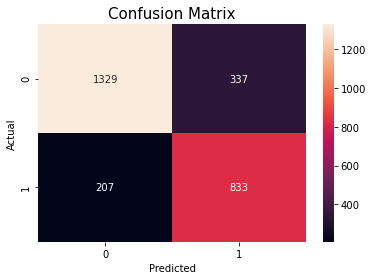

In [96]:
#Plotting heatmap
sns.heatmap(confusion_matrix(test_pred['True_values'], test_pred['Pred_values']), annot=True, fmt='g')
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [97]:
#Saving values of confusion matrix
cm = confusion_matrix(test_pred['True_values'], test_pred['Pred_values'])
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]

accuracy_test = (tp+tn)/(cm.sum())
precision_test = tp/(tp+fp)
recall_test = tp/(tp+fn)
sensitivity_test = tp/(tp+fn)
specificity_test = tn/(tn+fp)

print('Test Scores:'+'\n'+'*'*25)
print('Accuracy: ', round(accuracy_test,2))
print('Recall: ', round(recall_test,2))
print('Precision: ', round(precision_test,2))
print('Sensitivity: ', round(sensitivity_test,2))
print('Specificity: ', round(specificity_test,2))

Test Scores:
*************************
Accuracy:  0.8
Recall:  0.8
Precision:  0.71
Sensitivity:  0.8
Specificity:  0.8


#### Comparison - Train vs. Test

In [98]:
#Building a dataframe which shows all scores parallely
final_metrics = pd.DataFrame(columns=['Accuracy','Precision','Recall/Sensitivity','Specificity'])
final_metrics.loc['Train'] = [accuracy_train, precision_train, sensitivity_train, specificity_train]
final_metrics.loc['Test'] = [accuracy_test, precision_test, sensitivity_test, specificity_test]

round(final_metrics,2)

,Accuracy,Precision,Recall/Sensitivity,Specificity
Train,0.81,0.72,0.81,0.81
Test,0.80,0.71,0.80,0.80


- From the above scores, we can conclude that our model is able to generalize well based on the extremely low difference between scores of train and test.
- Based on the scores of our model, we can say that if the model predicts something being as __NEGATIVE__, there are extremely high chances that the __NEGATIVE prediction__ is actually __TRUE__. Although, the __POSITIVE predictions__ may have slightly lesser chance to be accurate.

## Final Lead Scores

In [99]:
#Predicting the lead scores(probabilities) and getting it in the range of [0-100]
X_train['Lead Scores'] = round(model.predict(X_train_sm)*100,2)
X_test['Lead Scores'] = round(model.predict(X_test_sm)*100,2)

#Appending the 'Lead Scores' and 'Converted' in the final dataset 'final_leads'
final_leads = pd.concat([X_train,X_test])
final_leads['Converted'] = pd.concat([y_train, y_test])

#Appending the predicted values based on the threshold
final_leads['Pred_converted'] = final_leads['Lead Scores'].apply(lambda x: 1 if x>35 else 0)

#Verifying the above
final_leads[['Converted','Lead Scores','Pred_converted']].head()

,Converted,Lead Scores,Pred_converted
2864,0,78.98,1
6824,1,66.40,1
7257,0,79.89,1
8325,1,91.05,1
5943,0,12.16,0


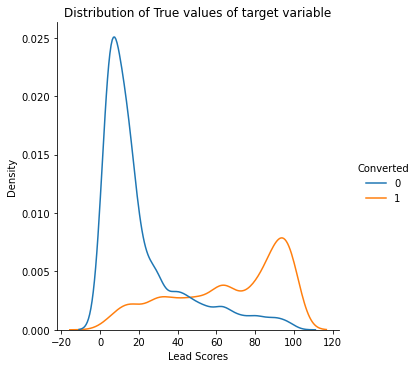

In [101]:
#Distribution of lead scores - True 1 vs 0
sns.displot(data=final_leads, x='Lead Scores', hue='Converted', kind='kde')
plt.title('Distribution of True values of target variable')
plt.show()

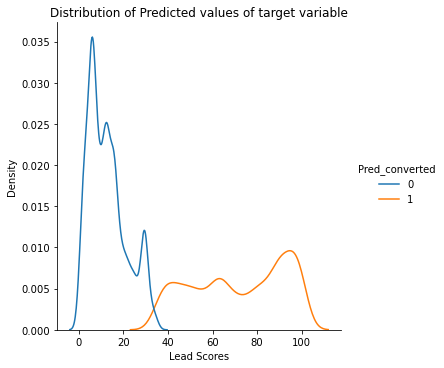

In [102]:
#Distribution of lead scores - Predicted 1 vs 0
sns.displot(data=final_leads, x='Lead Scores', hue='Pred_converted', kind='kde')
plt.title('Distribution of Predicted values of target variable')
plt.show()

- Based on the above plot we can see that our model is able to generalize well.
- While it shows a bigger distribution of __non-converted leads__ than __converted leads__, the pattern seems similar to the imbalance of our original _Target_ variable `Converted`

## Business Recommendations

Based on the final model built, we can conclude that the below are the parameters that have the top-most importance:
- `LeadOrigin_Lead Add Form`
- `What is your current occupation_Working Professional`
- `Last Notable Activity_SMS Sent`


All the above 3 variables have a positive effect over our target variable i.e. if the lead is a working professional who has originally filled the form and a SMS was sent by the end will have the highest chances of being a __converted lead__.

By focusing on the above 3 parameters, the sales team can check if the above conditions are satisfied and focus on converting the leads more efficiently. The probable leads can be identified on the basis of the __`Lead Scores`__ column, which is the prediction made by the final model.